https://datahack.analyticsvidhya.com/contest/janatahack-demand-forecasting/#MySubmissions

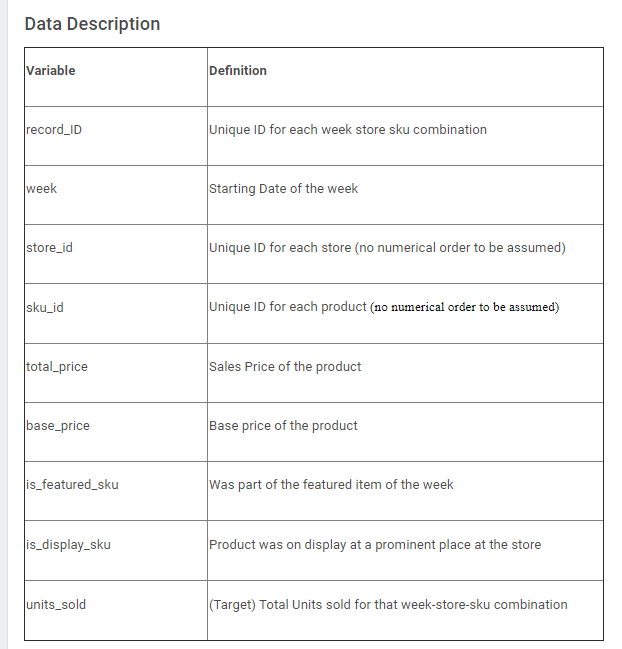

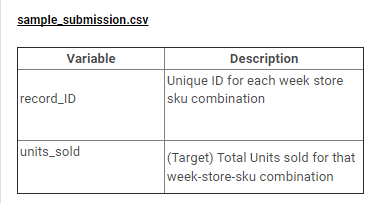

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# Importing data (train, test, sample submission)

In [154]:
train=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Regression\\Demand Forecasting\\train.csv',parse_dates = [1])
test=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Regression\\Demand Forecasting\\test.csv',parse_dates = [1])
ss=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Regression\\Demand Forecasting\\sample.csv')

train.shape, test.shape, ss.shape

((150150, 9), (13860, 8), (13860, 2))

In [155]:
train.head(3)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19


In [156]:
ss.head(3)

,record_ID,units_sold
0,212645,0
1,212646,0
2,212647,0


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.3 MB


In [158]:
train.nunique()

record_ID          150150
week                  130
store_id               76
sku_id                 28
total_price           646
base_price            572
is_featured_sku         2
is_display_sku          2
units_sold            708
dtype: int64

**76 stores**, 
**28 SKUs**

In [159]:
#Distinct Stores in train data
print("Total number of stores : ", train['store_id'].nunique())

#Distinct SKUs in train data
print("Total number of SKUs : ", train['sku_id'].nunique())

#Combining of store_id and sku_id
store_sku_train = (train['store_id'].astype(str) + "_" + train['sku_id'].astype(str)).unique()

#Distinct Store-SKU combinations in train data
print("There are", len(store_sku_train), "store-product pairs in train data")

Total number of stores :  76
Total number of SKUs :  28
There are 1155 store-product pairs in train data


In [160]:
ID_COL = 'record_ID'
TARGET_COL= 'units_sold'

In [161]:
num_cols=['total_price','base_price']
cat_cols=['store_id','sku_id', 'is_featured_sku','is_display_sku']
date_cols=['week']

#text_cols=['title','channel_title','tags','description']

# Target Distribution

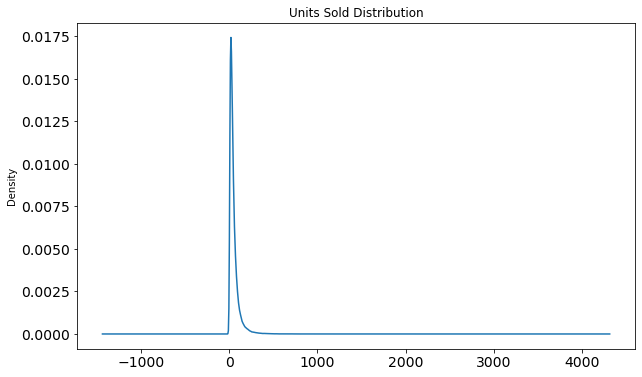

In [162]:
_ = train[TARGET_COL].plot(kind = 'density', title = 'Units Sold Distribution', fontsize=14, figsize=(10, 6))

As evident , sales (target) is highly **right skewed**

#### We need to do log transfomation to get normalized data



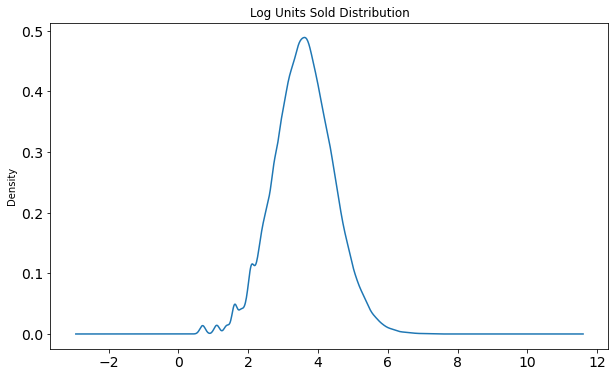

In [163]:
_ = pd.Series(np.log1p(train[TARGET_COL])).plot(kind = 'density', title = 'Log Units Sold Distribution', fontsize=14, figsize=(10, 6))

## Skewed data means lot of outliers. Lets check them by making boxplot

##### Target

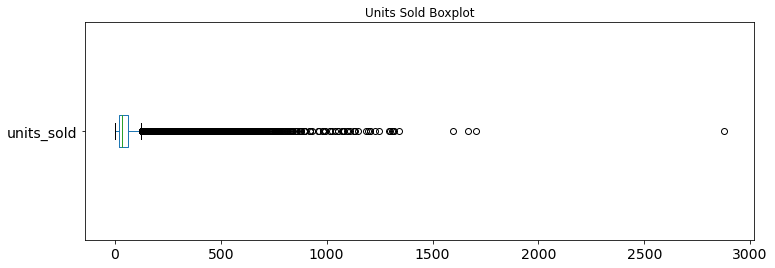

In [164]:
_ = train[TARGET_COL].plot(kind = 'box', vert=False, figsize=(12, 4), title = 'Units Sold Boxplot', fontsize=14)

**Log Transformed Target** (reduced outliers)

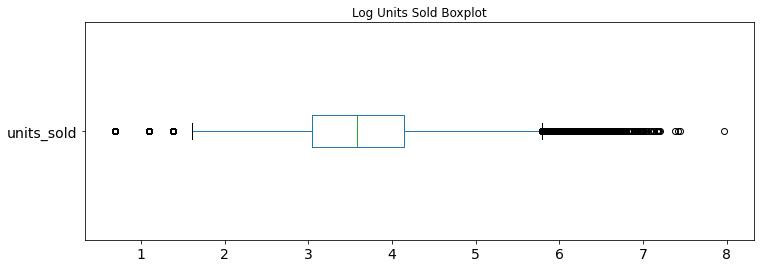

In [165]:
_ = pd.Series(np.log1p(train[TARGET_COL])).plot(kind = 'box',
                                                vert=False,
                                                figsize=(12, 4),
                                                title = 'Log Units Sold Boxplot',
                                                fontsize=14)

# Check NaN

In [166]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

units_sold         0.0
is_display_sku     0.0
is_featured_sku    0.0
base_price         0.0
total_price        0.0
sku_id             0.0
store_id           0.0
week               0.0
record_ID          0.0
dtype: float64

In [167]:
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
features

['week',
 'store_id',
 'sku_id',
 'total_price',
 'base_price',
 'is_featured_sku',
 'is_display_sku']

In [168]:
cat_cols = train.select_dtypes(include=['object'])


cat_cols = [c for c in features if c in cat_cols]

num_cols = ['total_price','base_price']
print('Categorical Cols')
print(cat_cols)
print('Numerical Cols')
print(num_cols)

Categorical Cols
[]
Numerical Cols
['total_price', 'base_price']


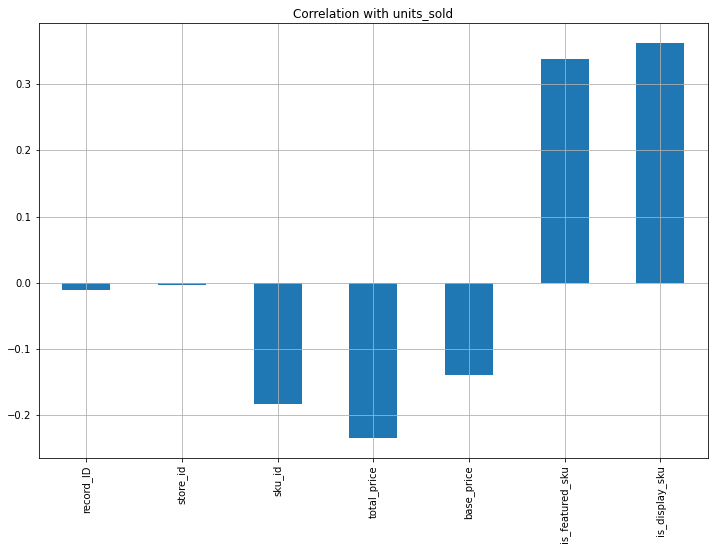

In [229]:
train.drop('units_sold', axis=1).corrwith(train.units_sold).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with units_sold")

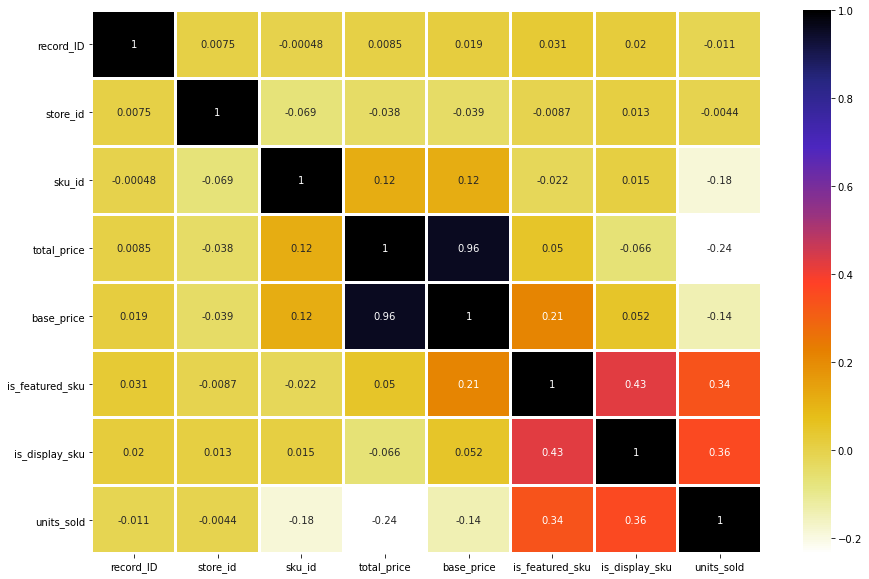

In [169]:
#Pearson Corellation

plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.CMRmap_r,linewidths=2)

# Modelling

In [170]:
train=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Regression\\Demand Forecasting\\train.csv',parse_dates = [1])
test=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Regression\\Demand Forecasting\\test.csv',parse_dates = [1])
ss=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Regression\\Demand Forecasting\\sample.csv')

train.shape, test.shape, ss.shape

((150150, 9), (13860, 8), (13860, 2))

In [171]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.simplefilter('ignore')

# Approach

**Steps to Make a Baseline Regression Model**

1. Concatenate/Join the train and test Datasets. All kinds of processing must be performed on both train and test datasets together.

2. Convert all Categorical Variables to numbers. We will be use OneHot Encoding for this. 

3. Fill Null Values. This can be followed by other data processing and feature engineering steps, but we will go into it later.

4. Split the dataset back into train and test datasets.

5. Split the train set into train and validation sets.

6. Fit a regression Model on train, check its results on validation set.

7. Predict for the test set.

8.  Save the submission as a csv file and submit the model on AV.

# Concating/Joining train and test datasets.

In [172]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df.shape

(164010, 9)

In [173]:
df.tail(3)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
164007,232285,2013-01-10,9984,245338,382.6125,401.8500,1,1,NaN
164008,232286,2013-01-10,9984,547934,191.6625,191.6625,0,0,NaN
164009,232287,2013-01-10,9984,679023,234.4125,234.4125,0,0,NaN


# 1.  Transforming num_cols & Target feature to log

Since the target feature is highly skewed, we will take the log and process it for Machine Learning Regression

In [174]:
num_cols 

['total_price', 'base_price']

In [175]:
df[num_cols + ['units_sold']] = df[num_cols + ['units_sold']].apply(lambda x: np.log1p(x))

In [176]:
df.head(3)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,4.605545,4.726170,0,0,3.044522
1,2,2011-01-17,8091,216419,4.605545,4.605545,0,0,3.367296
2,3,2011-01-17,8091,216425,4.904904,4.904904,0,0,2.995732


# 2. Segregating Dates to more features

Sometimes segregating date to week, month, quarter, year, day of week and likewise gives us more insight 

In [177]:

df['week']=pd.to_datetime(df.week)

df['year'] = df['week'].dt.year
df['quarter'] = df['week'].dt.quarter
df['month'] = df['week'].dt.month
df['date'] = df['week'].dt.day
df['week_day'] = df['week'].dt.dayofweek
df['is_weekend'] = np.where(df['week_day'].isin([5, 6]), 1, 0)
#train['is_weekday'] = np.where(train['week_day'].isin([0, 1, 2, 3, 4]), 1, 0)

df.head(2)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,quarter,month,date,week_day,is_weekend
0,1,2011-01-17,8091,216418,4.605545,4.726170,0,0,3.044522,2011,1,1,17,0,0
1,2,2011-01-17,8091,216419,4.605545,4.605545,0,0,3.367296,2011,1,1,17,0,0


In [178]:
df.isnull().sum()

record_ID              0
week                   0
store_id               0
sku_id                 0
total_price            1
base_price             0
is_featured_sku        0
is_display_sku         0
units_sold         13860
year                   0
quarter                0
month                  0
date                   0
week_day               0
is_weekend             0
dtype: int64

# 3. Handling NaN in train data

Filling NaN of total price with base_price

In [179]:
temp=df[df['total_price'].isnull()]['base_price']

In [180]:
#Replacing NaN with Baseprice
df['total_price']=df['total_price'].fillna(temp)

# 4. **Split the processed dataset back into train and test datasets.**

In [181]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

train_proc.shape, test_proc.shape

((150150, 15), (13860, 15))

# 5. **Split the train set into train and validation sets**

In [182]:
trn, val = train_test_split(train_proc, test_size=0.2, random_state = 1)

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
X_test = test_proc[features]

# **Helper fn. to evaluate model and accuracy**

**Mean Square Error**

In [183]:

from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))


In [184]:
#def metric(y_true,y_pred):
    #return 1000*np.sqrt(mean_squared_error(y_true,y_pred))
    #return 1000*mean_squared_log_error(y_true,y_pred)

# Helper Function to submit prediction

In [185]:
def submit(preds_test,file='C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Regression\\Demand Forecasting\\predictions.csv'):
    
    ss[TARGET_COL]=preds_test
    ss.to_csv(file,index=False)

# A) Base Line Models

### Model 1.  **Linear Regression** (**Validation - Only with Numerical Cols**)

In [186]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [187]:
clf = LinearRegression()
_=clf.fit(X_trn[num_cols],y_trn)

In [188]:
preds_val=clf.predict(X_val[num_cols])

**Validation Metric**

In [189]:
rmsle(y_val,preds_val)

0.18043610758146894

Error= **0.180**

**Transforming back test data from LOG**

In [190]:
preds_test= clf.predict(X_test[num_cols])
preds_test= np.expm1(preds_test)

In [191]:
submit(preds_test)

**Your private score for this submission is : 820.12, Had it been a live contest, your rank would be : 227**

### Model 2.  **Linear Regression** ( Numerical Cols + Category Cols**)

In [192]:
features = [c for c in X_trn.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in date_cols]

In [193]:
clf=LinearRegression()
_ = clf.fit(X_trn[cat_num_cols],y_trn)

In [194]:
preds_val=clf.predict(X_val[cat_num_cols])

**Validation Metric**

In [195]:
rmsle(y_val,preds_val)

0.16725093884444672

Error= **0.167**  So our score improved a bit after considering Numerical as well as Categorical features

**Transforming back test data from LOG**

In [196]:
preds_test=clf.predict(X_test[cat_num_cols])
preds_test= np.expm1(preds_test)

In [197]:
submit(preds_test)

**Your private score for this submission is : 739.1, Had it been a live contest, your rank would be : 214**

### Model 3. Decision Tree Regressor

In [198]:
clf=DecisionTreeRegressor(random_state=1)
_= clf.fit(X_trn[cat_num_cols],y_trn)

***Validation Metric***

In [199]:
preds_val=clf.predict(X_val[cat_num_cols])

rmsle(y_val,preds_val)

0.1392381142172447

Error = **0.139**. **As we can see Our model increased further by using Decision Tree Regressor**

Transforming back test data from LOG and submitting on Leaderboard

In [200]:
preds_test=clf.predict(X_test[cat_num_cols])
preds_test= np.expm1(preds_test)
submit(preds_test)

Your private score for this submission is : 710.82, Had it been a live contest, your rank would be : 210

 Let us try to do hyperparameter tuning in this model and see does it improve the model prediction?

### Model 4. Decision Tree Regressor (Hyperparameter Tuning)

In [201]:
from sklearn.model_selection import RandomizedSearchCV

In [202]:
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
}


In [203]:
clf = RandomizedSearchCV(DecisionTreeRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=1,
                         n_iter=20)

In [204]:
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])
search.best_params_

{'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

**Validation Metric**

In [205]:
best_params={'min_samples_split': 2,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'random_state': 1,       
 'max_depth': 12}

clf = DecisionTreeRegressor(**best_params)

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

rmsle(y_val, preds_val)


0.14142594715068693

**Error = *0.14***  No much significant improvement. Infact this tuning degrades the model performance for prediction

### Model 4. Random Forest Regressor (Hyperparameter Tuning)

In [206]:
from sklearn.ensemble import RandomForestRegressor

**Validation Metric**

In [207]:
clf = RandomForestRegressor(n_estimators=30, max_leaf_nodes = 16000, random_state=1)
clf.fit(X_trn[cat_num_cols], y_trn)
preds_val = clf.predict(X_val[cat_num_cols])


rmsle(y_val, preds_val)

0.10091916200358074

**Error = 0.10** Wow, A significant Improve. Random Forest perfrmed pretty well over Decision Tree.

Transforming back test data from LOG and submitting on Leaderboard

In [208]:
preds_test=clf.predict(X_test[cat_num_cols])
preds_test= np.expm1(preds_test)
submit(preds_test)

Your private score for this submission is : 536.01, Had it been a live contest, your rank would be : 159

# B) Base Line Models

### **Stratified K-Fold**

**Function to Run StratifiedKFold**

In [209]:
from sklearn.model_selection import StratifiedKFold

In [210]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = rmsle(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = rmsle(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  return oofs, preds

###   Stratified K Fold on Decision Tree Regressor 

In [211]:
dt_params = {'max_depth': 12,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 2}

clf = DecisionTreeRegressor(**dt_params)
        

dt_oofs, dt_preds = run_clf_kfold(clf, train_proc, test_proc, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 0.1509702133109915

------------- Fold 2 -------------

AV metric score for validation set is 0.14548327030542366

------------- Fold 3 -------------

AV metric score for validation set is 0.14412811782503443

------------- Fold 4 -------------

AV metric score for validation set is 0.15203757159037048

------------- Fold 5 -------------

AV metric score for validation set is 0.15370754641773549


AV metric for oofs is 0.14931291611549993


**AV metric for oofs is 0.1493**

In [212]:
#Submitting on Leaderboard

dt_preds_t = np.expm1(dt_preds)
submit(dt_preds_t)

Your private score for this submission is : 624.14, Had it been a live contest, your rank would be : 191

## Gradient Boosting 

## Model 1 : LightGBM

In [213]:
from lightgbm import LGBMRegressor

In [214]:
clf = LGBMRegressor()
lgb_oofs, lgb_preds = run_clf_kfold(clf, train_proc, test_proc, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 0.12483713974586622

------------- Fold 2 -------------

AV metric score for validation set is 0.12197466082042506

------------- Fold 3 -------------

AV metric score for validation set is 0.1234914824082555

------------- Fold 4 -------------

AV metric score for validation set is 0.12206745731712734

------------- Fold 5 -------------

AV metric score for validation set is 0.12949185535325394


AV metric for oofs is 0.12440327994733248


**AV metric for oofs is 0.12**

In [215]:
#Submitting on Leaderboard

lgb_preds_t = np.expm1(lgb_preds)
submit(lgb_preds_t)

Your private score for this submission is : 521.11, Had it been a live contest, your rank would be : 144

**Simple Function to Run Gradient Boosting**

In [216]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  feature_importances = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    
    
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = rmsle(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = rmsle(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  feature_importances = feature_importances.reset_index(drop = True)
  fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
  fi.plot(kind = 'barh', figsize=(12, 6))

  return oofs, preds, fi

Choosing Hyperparameters to Tune (Manual Tuning)


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.536473
[200]	valid_0's rmse: 0.499331
[300]	valid_0's rmse: 0.482877
[400]	valid_0's rmse: 0.473775
[500]	valid_0's rmse: 0.466659
[600]	valid_0's rmse: 0.461177
[700]	valid_0's rmse: 0.456636
[800]	valid_0's rmse: 0.45322
[900]	valid_0's rmse: 0.450881
[1000]	valid_0's rmse: 0.449475
Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.449427

AV metric score for validation set is 0.11347210330721985

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.529608
[200]	valid_0's rmse: 0.495801
[300]	valid_0's rmse: 0.482
[400]	valid_0's rmse: 0.47743
[500]	valid_0's rmse: 0.472473
[600]	valid_0's rmse: 0.469735
[700]	valid_0's rmse: 0.469002
Early stopping, best iteration is:
[624]	valid_0's rmse: 0.468586

AV metric score for validation set is 0.11589258481663205

------------- Fol

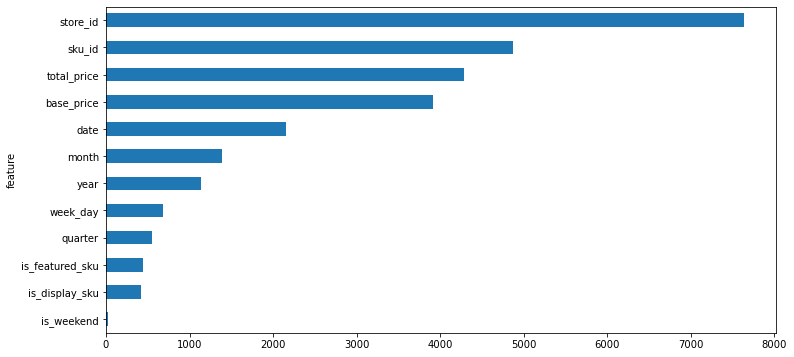

In [217]:
clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

**AV metric for oofs is 0.114**

In [218]:
#Submitting on Leaderboard

lgb_preds_t = np.expm1(lgb_preds)
submit(lgb_preds_t)

Your private score for this submission is : 477.406, Had it been a live contest, your rank would be : 79

**Tuning Learning Rate**


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.569809
[600]	valid_0's rmse: 0.523932
[900]	valid_0's rmse: 0.504347
[1200]	valid_0's rmse: 0.49145
[1500]	valid_0's rmse: 0.483009
[1800]	valid_0's rmse: 0.476481
[2100]	valid_0's rmse: 0.471492
[2400]	valid_0's rmse: 0.467227
[2700]	valid_0's rmse: 0.463463
[3000]	valid_0's rmse: 0.460545
[3300]	valid_0's rmse: 0.458096
[3600]	valid_0's rmse: 0.4555
[3900]	valid_0's rmse: 0.453668
[4200]	valid_0's rmse: 0.451909
[4500]	valid_0's rmse: 0.450807
[4800]	valid_0's rmse: 0.449574
Did not meet early stopping. Best iteration is:
[4983]	valid_0's rmse: 0.448829

AV metric score for validation set is 0.11321857011778765

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.563955
[600]	valid_0's rmse: 0.518362
[900]	valid_0's rmse: 0.499003
[1200]	valid_0's rmse: 0.489546
[1500]	valid_0's rmse: 0.483545
[1

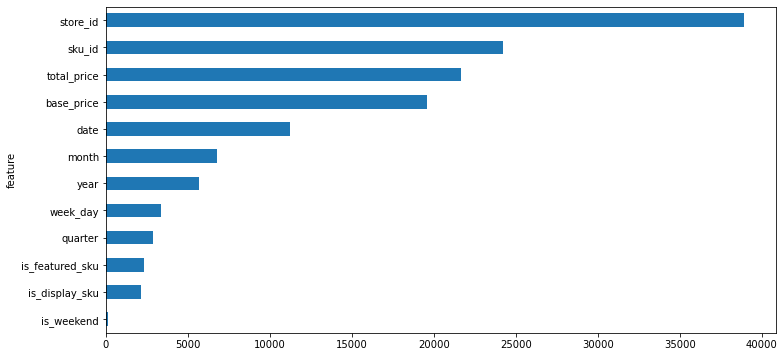

In [219]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

**AV metric for oofs is 0.113**

## Model 2 : CatBoost


------------- Fold 1 -------------
0:	learn: 0.8568617	test: 0.8625799	best: 0.8625799 (0)	total: 13.6ms	remaining: 40.9s
200:	learn: 0.6565413	test: 0.6576967	best: 0.6576967 (200)	total: 3.51s	remaining: 48.8s
400:	learn: 0.6130042	test: 0.6230431	best: 0.6230431 (400)	total: 7.67s	remaining: 49.7s
600:	learn: 0.5877846	test: 0.6036625	best: 0.6036625 (600)	total: 11.1s	remaining: 44.5s
800:	learn: 0.5691787	test: 0.5891082	best: 0.5891082 (800)	total: 14.6s	remaining: 40.1s
1000:	learn: 0.5554237	test: 0.5791283	best: 0.5791283 (1000)	total: 17.9s	remaining: 35.7s
1200:	learn: 0.5438641	test: 0.5701934	best: 0.5701934 (1200)	total: 21.1s	remaining: 31.6s
1400:	learn: 0.5335986	test: 0.5622228	best: 0.5622228 (1400)	total: 24.4s	remaining: 27.8s
1600:	learn: 0.5241291	test: 0.5545113	best: 0.5545113 (1600)	total: 27.6s	remaining: 24.1s
1800:	learn: 0.5158263	test: 0.5484571	best: 0.5484571 (1800)	total: 30.7s	remaining: 20.5s
2000:	learn: 0.5079490	test: 0.5425758	best: 0.5425758 (2

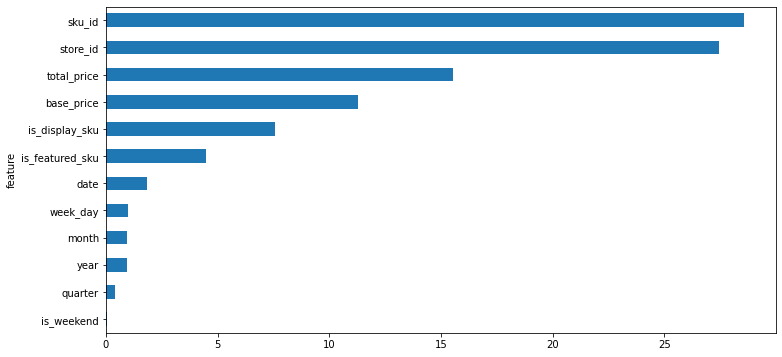

In [220]:
clf = CatBoostRegressor(n_estimators = 3000,
                       learning_rate = 0.01,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

**AV metric for oofs is 0.129**

In [221]:
#Submitting on Leaderboard

cb_preds_t = np.expm1(cb_preds)
submit(cb_preds_t)

# Model 3 : XGBoost


------------- Fold 1 -------------
[0]	validation_0-rmse:3.05623
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.51154
[400]	validation_0-rmse:0.48141
[600]	validation_0-rmse:0.47253
[800]	validation_0-rmse:0.46606
[999]	validation_0-rmse:0.46234

AV metric score for validation set is 0.11633546995711586

------------- Fold 2 -------------
[0]	validation_0-rmse:3.05267
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.51269
[400]	validation_0-rmse:0.48535
[600]	validation_0-rmse:0.47454
[800]	validation_0-rmse:0.47425
Stopping. Best iteration:
[708]	validation_0-rmse:0.47207


AV metric score for validation set is 0.11690454467301918

------------- Fold 3 -------------
[0]	validation_0-rmse:3.05183
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.50851
[400]	validation_0-rmse:0.48406
[600]	validation_0-rmse:0.47570
[800]	validation_0-rmse:0.47146
[999]	valid

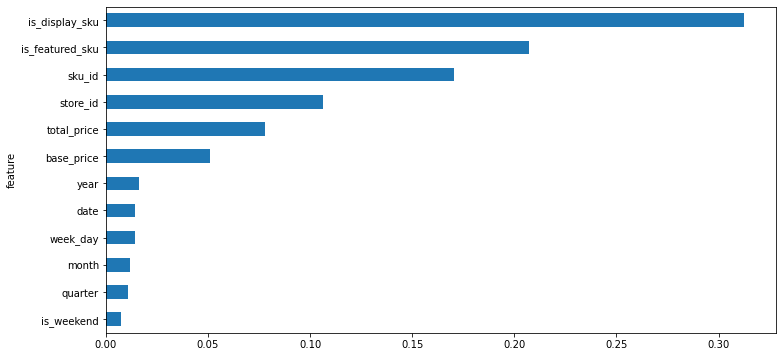

In [222]:
clf = XGBRegressor(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

**AV metric for oofs is 0.115**

In [223]:
#Submitting on Leaderboard

xgb_preds_t = np.expm1(xgb_preds)
submit(xgb_preds_t)

# Feature Engineering

### **Frequency Features**

In [224]:
df.columns

Index(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold', 'year', 'quarter',
       'month', 'date', 'week_day', 'is_weekend'],
      dtype='object')

In [225]:
df.store_id.nunique(), df.sku_id.nunique()

(76, 28)

In [226]:
train_proc['store_id_num_stores'] = train_proc['store_id'].map(train_proc['store_id'].value_counts())
train_proc['sku_id_num_stores'] = train_proc['sku_id'].map(train_proc['sku_id'].value_counts())

In [227]:
train_proc.head(2)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,quarter,month,date,week_day,is_weekend,store_id_num_stores,sku_id_num_stores
0,1,2011-01-17,8091,216418,4.605545,4.726170,0,0,3.044522,2011,1,1,17,0,0,1170,8840
1,2,2011-01-17,8091,216419,4.605545,4.605545,0,0,3.367296,2011,1,1,17,0,0,1170,8710


### LGBM 


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.489963
[600]	valid_0's rmse: 0.467805
[900]	valid_0's rmse: 0.460414
[1200]	valid_0's rmse: 0.455021
[1500]	valid_0's rmse: 0.451173
[1800]	valid_0's rmse: 0.448079
[2100]	valid_0's rmse: 0.446972
[2400]	valid_0's rmse: 0.445636
[2700]	valid_0's rmse: 0.444869
[3000]	valid_0's rmse: 0.444658
[3300]	valid_0's rmse: 0.444099
[3600]	valid_0's rmse: 0.443366
[3900]	valid_0's rmse: 0.442593
[4200]	valid_0's rmse: 0.442499
[4500]	valid_0's rmse: 0.441032
[4800]	valid_0's rmse: 0.440864
Did not meet early stopping. Best iteration is:
[4988]	valid_0's rmse: 0.440345

AV metric score for validation set is 0.11130041553678115

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.486896
[600]	valid_0's rmse: 0.470877
[900]	valid_0's rmse: 0.466126
[1200]	valid_0's rmse: 0.463979
[1500]	valid_0's rmse: 0.462197

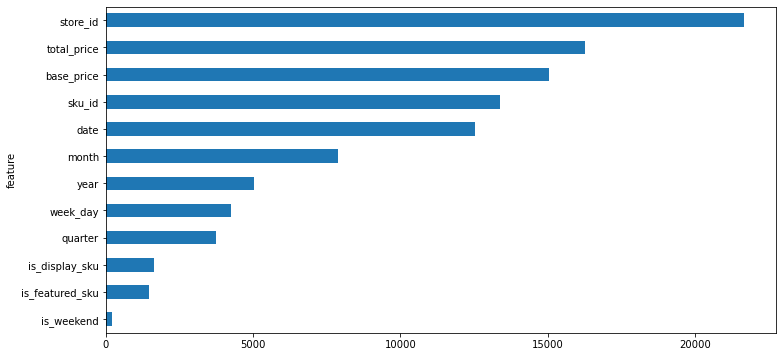

In [228]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.65,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

**AV metric for oofs is 0.111**